 **Fake Currency Detection**


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [14]:
data = pd.read_csv('data_banknote_authentication.txt', header=None)

In [15]:
data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df = pd.DataFrame(data)

In [5]:
df.columns = ['var', 'skew', 'curt', 'entr', 'auth']

In [6]:
df.head()

,var,skew,curt,entr,auth
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
data.isnull().sum()

var     0
skew    0
curt    0
entr    0
auth    0
dtype: int64

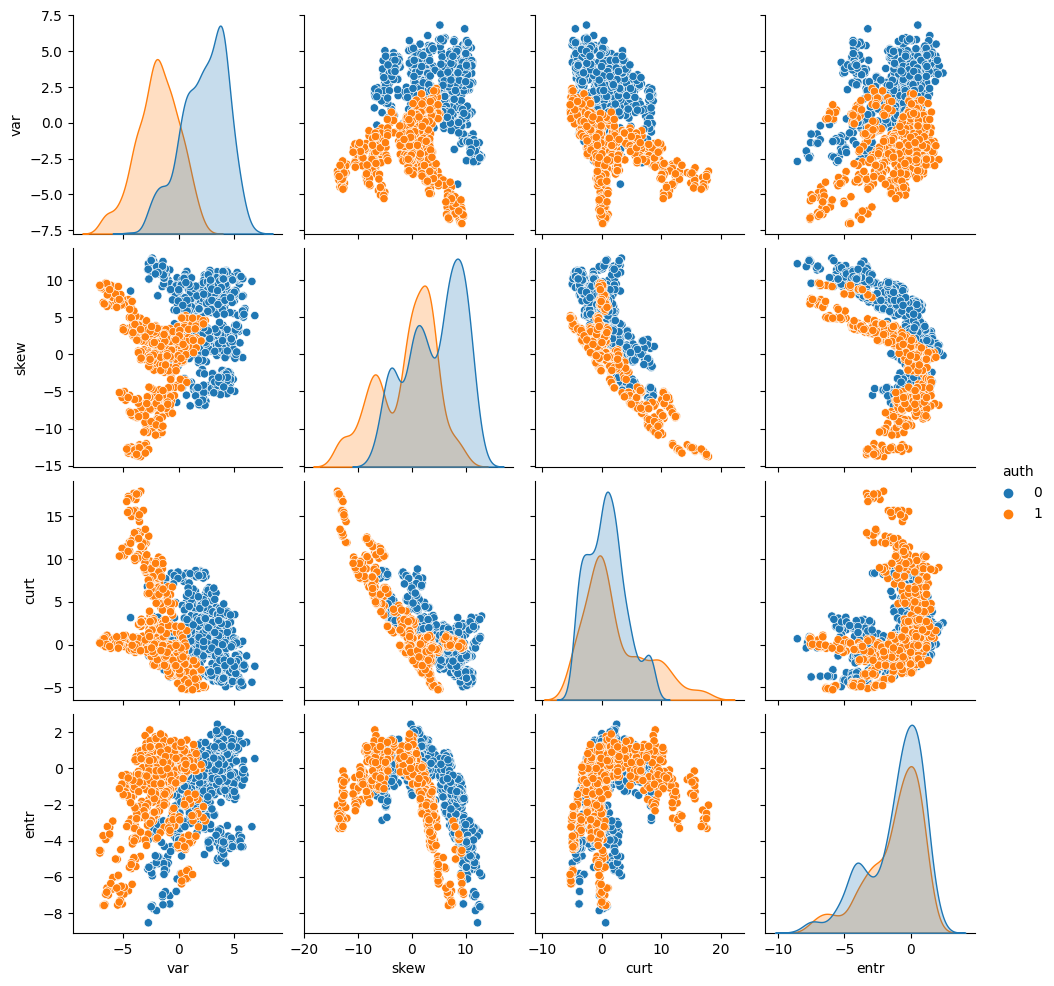

In [8]:
sns.pairplot(data, hue='auth')

In [9]:
#from this pairplot we can make several interesting observations:
#     1. The distribution of both variance and skewness appears to be quite different for the two target characteristics, while kurtosis and entropy appear to be more similar.
#     2. There are clear linear and nonlinear trends in the input features.
#     3. Some characteristics seem to be correlated.
#     4. Some features seem to separate genuine and fake banknotes quite well.
    

<AxesSubplot: title={'center': 'Distribution of Target'}, xlabel='auth', ylabel='count'>

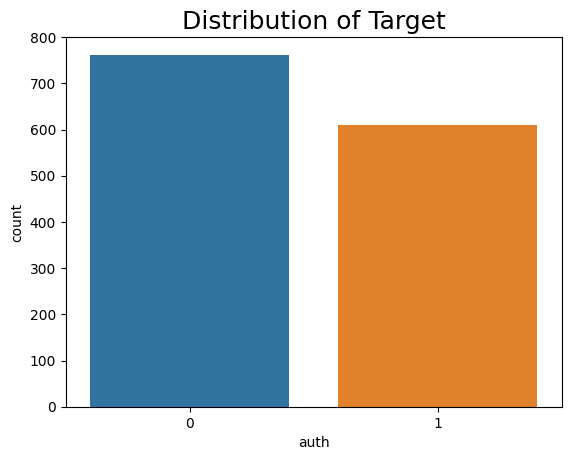

In [10]:
plt.title('Distribution of Target', size=18)
sns.countplot(x=df['auth'], data = df)


In [17]:
X = df.drop('auth', axis=1)
y = df['auth']

In [48]:
Over = RandomOverSampler(sampling_strategy='minority')

In [49]:
X_over, Y_over = Over.fit_resample(X, y)

In [50]:
X_over.shape

(1524, 4)

In [51]:
Y_over.shape

(1524,)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
scalar = StandardScaler()
scalar.fit(x_train)

StandardScaler()

In [54]:
train_x = scalar.transform(x_train)
test_x = scalar.transform(x_test)

In [55]:
lr = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')

In [60]:
lr.fit(train_x, y_train.values.ravel())

LogisticRegression(random_state=42)

In [66]:
y_pred = np.array(lr.predict(x_test))

C:\Users\91960\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [67]:
Confusion_Matrix = confusion_matrix(y_test, y_pred)

In [68]:
Confusion_Matrix

array([[229,   0],
       [ 73, 110]], dtype=int64)

In [73]:
precision_score(y_test, y_pred)

1.0

**Prediction**

In [79]:
New_notes = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)

In [80]:
New_Bank_Notes = scalar.transform(New_notes)

C:\Users\91960\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:
f'prediction: Class{lr.predict(New_Bank_Notes)[0]}'

'prediction: Class0'

In [82]:
f'probability [0/1]: {lr.predict_proba(New_Bank_Notes)[0]}'

'probability [0/1]: [0.70810679 0.29189321]'

**The target value is simply 0 for real banknotes and 1 for fake banknotes. 
